In [ ]:
# #d.trainX is a (60000,784) matrix which contains the pixel data for training
# #d.trainY is a (1,60000) matrix which contains the labels for the training data
# #d.testX is a (10000,784) matrix which contains the pixel data for testing
# #d.testY is a (1,10000) matrix which contains the labels for the test set
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
!ls
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import metrics
import operator
from multiprocessing import Process
from multiprocessing import Pool

data = sio.loadmat('mnist.mat?raw=true')
train_X = data['trainX'] / 255.0
train_Y = data['trainY'][0]

test_X = data['testX'] / 255.0
test_Y = data['testY'][0]

train_data = train_X[:10000]#(10000, 784)
train_labels = train_Y[:len(train_data)]#(10000,)

test_data = test_X[:1000]#(1000, 784)
test_labels = test_Y[:len(test_data)]#(1000,)

--2022-12-07 19:45:23--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2022-12-07 19:45:24--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2022-12-07 19:45:24--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

train:
 5


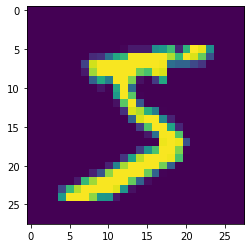

test:
 7


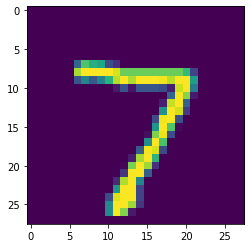

In [ ]:
print("train:\n",train_Y[0])
plt.imshow(train_X[0].reshape((28, 28)))
plt.show()

print("test:\n", test_Y[0])
plt.imshow(test_X[0].reshape((28, 28)))
plt.show()

#they are equal.

In [ ]:
def transform(data, M):
  cov = np.cov(data.T)
  eig_vals, eig_vecs  = np.linalg.eig(np.array(cov))
  sorted_eig, eig_vecs = zip(*sorted(zip(list(eig_vals), list(eig_vecs.T)),key=lambda x: x[0], reverse=True))
  eig_vecs = np.array(eig_vecs).T
  M_transformed = eig_vecs[:,0:M]

  projected_data = train_data.dot(M_transformed)
  projected_test = test_data.dot(M_transformed)

  return projected_data, projected_test

In [ ]:
def d(a, b):
  return np.sqrt(np.sum((a - b)**2))

In [ ]:
def nearest_neighbor(given_img, K, data, label):
  distance = [d(data[i], given_img) for i in range(len(data))]
  sort = np.argpartition(distance, K)
  class_num, count = np.unique(label[sort[:K]], return_counts=True)
  return class_num[np.argmax(count)]

In [ ]:
accuracy_List = []
def accuracy(train, train_lab, M):
  for j in range(1, M+1):
    count_correct = 0
    count_wrong = 0
    accuracy = 0
    p_data, p_test = transform(train, j)
    for i in range(1000):
      class_num = nearest_neighbor(p_test[i], 5, p_data, train_labels)
      if(class_num == test_labels[i]):
        count_correct += 1
      else:
        count_wrong += 1
    accuracy = (count_correct / (count_correct + count_wrong)) * 100
    accuracy_List.append(accuracy)
    print("correct: %d wrong: %d accuracy: %d percent M: %d" % (count_correct, count_wrong, accuracy, j))

In [ ]:
accuracy(train_data, train_labels, 30)

correct: 273 wrong: 727 accuracy: 27 percent M: 1
correct: 426 wrong: 574 accuracy: 42 percent M: 2
correct: 491 wrong: 509 accuracy: 49 percent M: 3
correct: 616 wrong: 384 accuracy: 61 percent M: 4
correct: 708 wrong: 292 accuracy: 70 percent M: 5
correct: 777 wrong: 223 accuracy: 77 percent M: 6
correct: 843 wrong: 157 accuracy: 84 percent M: 7
correct: 873 wrong: 127 accuracy: 87 percent M: 8
correct: 885 wrong: 115 accuracy: 88 percent M: 9
correct: 885 wrong: 115 accuracy: 88 percent M: 10
correct: 894 wrong: 106 accuracy: 89 percent M: 11
correct: 913 wrong: 87 accuracy: 91 percent M: 12
correct: 917 wrong: 83 accuracy: 91 percent M: 13
correct: 921 wrong: 79 accuracy: 92 percent M: 14
correct: 921 wrong: 79 accuracy: 92 percent M: 15
correct: 925 wrong: 75 accuracy: 92 percent M: 16
correct: 929 wrong: 71 accuracy: 92 percent M: 17
correct: 936 wrong: 64 accuracy: 93 percent M: 18
correct: 939 wrong: 61 accuracy: 93 percent M: 19
correct: 939 wrong: 61 accuracy: 93 percent M: 2

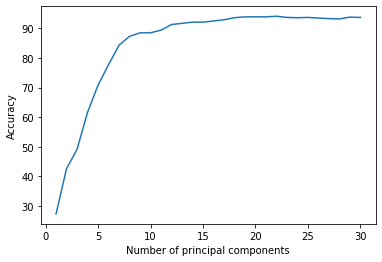

In [ ]:
principal_Components = list(range(1,31))
plt.plot(principal_Components, accuracy_List)
plt.ylabel("Accuracy")
plt.xlabel("Number of principal components")
plt.show()